### importamos las librerias a utilizar

In [55]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Input
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from sklearn.model_selection import train_test_split
import os

### Preparacion de espacio de trabajo

especificamos la ruta de nuestro dataset, un arreglo para guardar las categorias que vayamos encontrando y la dimension a trabajar con nuestras imagenes

In [56]:
DATADIR = '/home/lenin/Documents/datasets/colores'
CATEGORIES = []
IMG_SIZE=5

recorremos el direcotorio excluyendo las imagenes de testeo

In [57]:
for cate in os.listdir(DATADIR):
    if cate == 'testimg': continue
    CATEGORIES.append(cate)
print(f'categorias encontradas: {CATEGORIES}\n total: {len(CATEGORIES)}')

categorias encontradas: ['blanco', 'verde', 'gris', 'negro', 'azul', 'amarillo', 'cafe', 'naranja', 'rosado', 'morado', 'rojo', 'celeste']
 total: 12


### Recoleccion de datos
recorremos el directorio tomando cada imagen segun su respectiva categoria

In [58]:
training_data=[] #var para los datos recolectados
labels=0
for category in CATEGORIES:
    path=os.path.join(DATADIR, category)
    for fname in os.listdir(path):
        img = load_img((path+'/'+fname), target_size=(IMG_SIZE,IMG_SIZE))
        x = img_to_array(img)
        x=x/255
        training_data.append([x,labels])
    labels+=1
print('done')

done


verificamos el total de datos que tenemos

In [59]:
lenofimage = len(training_data)
print(lenofimage)

2400


### Tratamiento de los datos
separamos  nuestra data en img-labels y los tratamos con numpy

In [60]:
X=[]
y=[]
for img, label in training_data:
    X.append(img)
    y.append(label)
print('done')

done


verificamos la forma de nuestra data

In [61]:
X=np.array(X)
y=np.array(y)
print('labels',y.shape)
print('img',X.shape)

labels (2400,)
img (2400, 5, 5, 3)


dividimos la data para train y test

In [62]:
X_train, X_test, y_train, y_test = train_test_split(X,y)
print(f'train: {len(X_train)}, test: {len(X_test)}')

train: 1800, test: 600


### Creacion del modelo
creamos la arquitectura del modelo, lo compilamos y finalmente ajustamos

In [63]:
model = Sequential([
    Conv2D(32, (3,3), activation='relu', padding='SAME', input_shape=X_train[0].shape),
    MaxPooling2D((3,3)),
    Flatten(),
    Dense(15, activation='relu'),
    Dense(len(CATEGORIES), activation='softmax'),
])

In [64]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 5, 5, 32)          896       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 1, 1, 32)         0         
 2D)                                                             
                                                                 
 flatten_3 (Flatten)         (None, 32)                0         
                                                                 
 dense_6 (Dense)             (None, 15)                495       
                                                                 
 dense_7 (Dense)             (None, 12)                192       
                                                                 
Total params: 1,583
Trainable params: 1,583
Non-trainable params: 0
____________________________________________________

In [65]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(X_train, y_train, epochs=15, batch_size=20)

Epoch 1/15
90/90 [==============================] - 1s 3ms/step - loss: 2.3197 - accuracy: 0.2567
Epoch 2/15
90/90 [==============================] - 0s 3ms/step - loss: 1.8687 - accuracy: 0.4767
Epoch 3/15
90/90 [==============================] - 0s 3ms/step - loss: 1.3727 - accuracy: 0.6644
Epoch 4/15
90/90 [==============================] - 0s 3ms/step - loss: 1.0101 - accuracy: 0.7861
Epoch 5/15
90/90 [==============================] - 0s 3ms/step - loss: 0.7786 - accuracy: 0.8372
Epoch 6/15
90/90 [==============================] - 0s 3ms/step - loss: 0.6295 - accuracy: 0.8617
Epoch 7/15
90/90 [==============================] - 0s 3ms/step - loss: 0.5353 - accuracy: 0.8717
Epoch 8/15
90/90 [==============================] - 0s 3ms/step - loss: 0.4674 - accuracy: 0.8883
Epoch 9/15
90/90 [==============================] - 0s 3ms/step - loss: 0.4253 - accuracy: 0.8883
Epoch 10/15
90/90 [==============================] - 0s 3ms/step - loss: 0.3860 - accuracy: 0.9011
Epoch 11/15
90/90 [

verificamos la prescicion en testeo

In [66]:
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=0)
print('test loss',test_loss)
print('test accuracy',test_accuracy)

test loss 0.31058356165885925
test accuracy 0.9083333611488342


### Probamos el modelo entrenado

1/1 [==============================] - 0s 68ms/step
prediccion = naranja


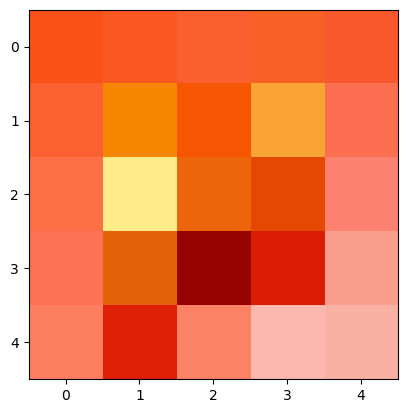

In [67]:
#ruta a nuestras imagenes de test en el directorio, no de la data preparada
path = DATADIR + '/testimg' + '/49.jpg' 

#tratamos la img con el mismo tamanio y la normalizamos
img = load_img(path, target_size=(IMG_SIZE,IMG_SIZE))
x = img_to_array(img)
x=x/255

#agrego un eje para que el modelo lo reciba
x = x[np.newaxis, ...]

#imprimo la img y la prediccion
plt.imshow(img)
resp = model.predict(x)
print(f'prediccion = {CATEGORIES[np.argmax(resp[0])]}')

### Exportacion
con el modelo ya funcionando correctamente, lo exportamos para poder utilizarlo en otros proyectos

In [68]:
model.save('mod_color_v1.h5')
model.save_weights("mod_color_v1_weights.h5")

para cargarlos

In [69]:
# Cargar la estructura del modelo
modelo_cargado = tf.keras.models.load_model("mod_color_v1.h5")

# Cargar los pesos del modelo
modelo_cargado.load_weights("mod_color_v1_weights.h5")
